# import the relevant libraries

In [44]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
import pickle

In [4]:
# load data set
data = pd.read_csv('review_data.csv',index_col=False)
#check 5sample data 
data.sample(5)

,Rating,Review
18544,4,Pretty good
5173,4,Worth the money
15807,4,Very Good
15609,5,Great product
9525,5,Must buy!


# description the data

In [5]:
data.describe()

,Rating
count,19795.000000
mean,4.629856
std,0.608408
min,3.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
#check null data 
data.isnull().sum()

Rating    0
Review    2
dtype: int64

In [7]:
#fill null values 
data['Review']=data['Review'].replace(np.nan,"good")

In [8]:
#check unique ratings in the data
data['Rating'].unique()

array([5, 3, 4], dtype=int64)

In [9]:
#distribution of each class within the table
data['Rating'].value_counts(normalize=True)

5    0.698358
4    0.233140
3    0.068502
Name: Rating, dtype: float64

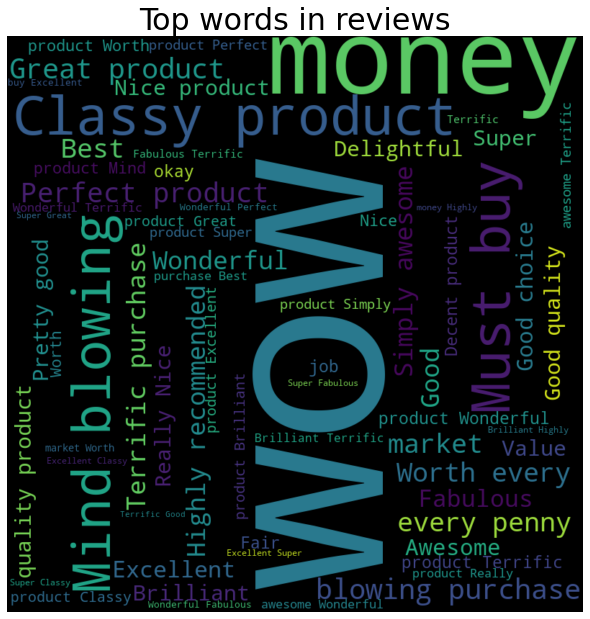

In [10]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()

wordCloud_generator(data['Review'], title="Top words in reviews")

# Encoding

In [20]:
X = data['Review'].copy()
y = data['Rating'].copy()

In [32]:
X = preprocessing.LabelEncoder().fit_transform(X)
X = pd.DataFrame({'Review':X})

In [34]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }
labels = ['1', '2', '3', '4', '5']
y = data['Rating'].copy()
y.replace(encoding, inplace=True)

In [36]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# DecisionTreeClassifier

In [41]:
m1 = DecisionTreeClassifier(random_state=1)
#fit model usint X_train and y_train
m1.fit(X_train, y_train)
#y predict usint x_tex
y_pred1 = m1.predict(X_test)

# check model score
DT_score = m1.score(X_test,y_test)

#check mean sqare error
DT_mse = mean_squared_error(y_pred1,y_test)
#root mean squared error
DT_rmse = np.sqrt(DT_mse)


#print score of model , mean suared error , root mean square score and classification report
print(f'score of model is : {DT_score}')#print model score
print('mean squared error is : ',DT_mse)#print mean squared error
print(f'root mean squared error is : {DT_rmse}\n')#print root mean squared error
print(classification_report(y_test, y_pred1))

score of model is : 0.9725197009496868
mean squared error is :  0.029905031319458476
root mean squared error is : 0.17293071248178699

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       328
           3       0.99      0.89      0.94      1149
           4       0.97      1.00      0.98      3472

    accuracy                           0.97      4949
   macro avg       0.98      0.96      0.97      4949
weighted avg       0.97      0.97      0.97      4949



# RandomForestClassifier

In [43]:
m2 = RandomForestClassifier(random_state=1)
#fit model using strain and y train
m2.fit(X_train, y_train)

#y predict usint x_tex
y_pred2 = m2.predict(X_test)

# check model score
RF_score = m2.score(X_test,y_test)

#check mean sqare error
RF_mse = mean_squared_error(y_pred2,y_test)
#root mean squared error
RF_rmse = np.sqrt(RF_mse)

#print score of model , mean suared error , root mean square score and classification report
print(f'score of model is : {RF_score}')#print model score
print('mean squared error is : ',RF_mse)#print mean squared error
print(f'root mean squared error is : {RF_rmse}\n')#print root mean squared error
print(classification_report(y_test, y_pred2))

score of model is : 0.9725197009496868
mean squared error is :  0.029905031319458476
root mean squared error is : 0.17293071248178699

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       328
           3       0.99      0.89      0.94      1149
           4       0.97      1.00      0.98      3472

    accuracy                           0.97      4949
   macro avg       0.98      0.96      0.97      4949
weighted avg       0.97      0.97      0.97      4949



# AdaBoostClassifier

In [45]:
m3 = AdaBoostClassifier(random_state=1)
#fit model
m3.fit(X_train, y_train)
#predict value
y_pred3 = m3.predict(X_test)

# check model score
AB_score = m3.score(X_test,y_test)

#check mean sqare error
AB_mse = mean_squared_error(y_pred2,y_test)
#root mean squared error
AB_rmse = np.sqrt(AB_mse)

#print score of model , mean suared error , root mean square score and classification report
print(f'score of model is : {AB_score}')#print model score
print('mean squared error is : ',AB_mse)#print mean squared error
print(f'root mean squared error is : {AB_rmse}\n')#print root mean squared error
print(classification_report(y_test, y_pred3))

score of model is : 0.8292584360476865
mean squared error is :  0.029905031319458476
root mean squared error is : 0.17293071248178699

              precision    recall  f1-score   support

           2       0.96      0.63      0.76       328
           3       0.97      0.38      0.55      1149
           4       0.81      1.00      0.89      3472

    accuracy                           0.83      4949
   macro avg       0.91      0.67      0.73      4949
weighted avg       0.86      0.83      0.80      4949



# Saving Model

In [47]:
#save all model

#save model Decision Tree
file = 'RATINGS PREDICTION'
#save file
save = pickle.dump(m1,open(file,'wb'))

#save model Random Forest
file = 'RATINGS PREDICTION'
#save file
save = pickle.dump(m2,open(file,'wb'))

#save model AdaBoost
file = 'RATINGS PREDICTION'
#save file
save = pickle.dump(m3,open(file,'wb'))